Aditya Aggarwal 18803011 B13 

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Q1
from scipy.sparse import csr_matrix
a = np.zeros((3, 3), int)
np.fill_diagonal(a, 1)
print(a)
print()
M=csr_matrix(a)
print(M.todense())

[[1 0 0]
 [0 1 0]
 [0 0 1]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [4]:
#Q2
from scipy import stats
print(stats.describe(data['data']))

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))


In [5]:
#Q3
from sklearn.model_selection import train_test_split
X=data['data']
y=data['target']
print(len(X))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)
print(len(X_train),len(X_test))

150
105 45


# Q4

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
X=data['data']
y=data['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)


KNN

Preliminary model score:
0.9666666666666667


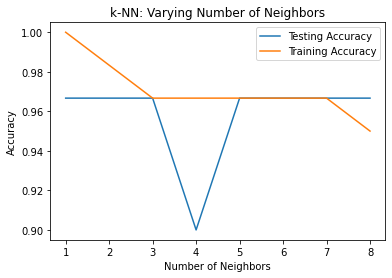

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

print("Preliminary model score:")
print(knn.score(X_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

SVC

In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import explained_variance_score
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))

0.9535256410256411


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Q5

In [15]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
regressor = LinearRegression()
model = regressor.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(explained_variance_score(y_test, y_pred))

0.6384514380594493
